# Introdução
Nesse notebook analisamos dados de dois dataframes sobre a vacinação de Covid-19. 
Estamos interessados em identificar padrões de novos casos ao redor do mundo, evidências de desigualdades e a importância da distribuição de vacinas. 

## Bibliotecas

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

## Processamento

In [23]:
df_vaccination = pd.read_csv("vaccinations.csv")
df_covidIndicators = pd.read_csv("owid-covid-data.csv")

In [24]:
# Convertendo a coluna "date" para o tipo datetime - df de vacinação
df_vaccination["date"] = pd.to_datetime(df_vaccination.date)

In [25]:
# Convertendo a coluna "date" para o tipo datetime - df de indicadores 
df_covidIndicators["date"] = pd.to_datetime(df_covidIndicators.date)

In [26]:
# Descobrindo o intervalo de datas do dataframe (executei uma linha por vez) 
df_vaccination.sort_values("date").head(15)
df_vaccination.sort_values("date", ascending=False).head(15)
# A menor e a maior datas são 2020-12-02 / 2023-08-07

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
174413,World,OWID_WRL,2023-08-07,1.349580e+10,5.620732e+09,5.168395e+09,2.791523e+09,NaN,NaN,169.22,70.48,64.81,35.00,NaN,NaN,NaN
93845,Lower middle income,OWID_LMC,2023-08-07,4.929835e+09,2.274771e+09,2.046784e+09,6.694347e+08,NaN,NaN,143.64,66.28,59.64,19.51,NaN,NaN,NaN
9904,Asia,OWID_ASI,2023-08-07,9.067127e+09,3.684316e+09,3.458078e+09,1.806047e+09,NaN,NaN,192.04,78.03,73.24,38.25,NaN,NaN,NaN
116821,North America,OWID_NAM,2023-08-07,1.151679e+09,4.585070e+08,3.944108e+08,2.515308e+08,NaN,NaN,191.84,76.38,65.70,41.90,NaN,NaN,NaN
53486,European Union,OWID_EUN,2023-08-07,9.422322e+08,3.382211e+08,3.281692e+08,2.794996e+08,NaN,NaN,209.32,75.14,72.90,62.09,NaN,NaN,NaN
8938,Aruba,ABW,2023-08-07,1.748000e+05,9.046800e+04,8.433200e+04,NaN,NaN,0.0,164.19,84.98,79.22,NaN,0.0,0.0,0.000
52509,Europe,OWID_EUR,2023-08-07,1.385186e+09,5.230633e+08,4.933039e+08,3.591812e+08,NaN,NaN,185.98,70.23,66.23,48.22,NaN,NaN,NaN
14603,Bangladesh,BGD,2023-08-07,3.615261e+08,1.514815e+08,1.420996e+08,6.852658e+07,NaN,6078.0,211.19,88.49,83.01,40.03,36.0,249.0,0.000
92009,Lithuania,LTU,2023-08-07,4.546133e+06,1.957178e+06,1.880555e+06,9.443820e+05,NaN,2.0,165.31,71.17,68.38,34.34,1.0,0.0,0.000
41434,Czechia,CZE,2023-08-07,1.862598e+07,6.976657e+06,6.893374e+06,5.167295e+06,NaN,5.0,177.49,66.48,65.69,49.24,0.0,1.0,0.000


In [27]:
# Filtrando os dados para focar no que será utilizado na análise - df de vacinação
# O ano analisado será 2021
df_filtrado = df_vaccination[(df_vaccination['date'] > "2020-12-31") & (df_vaccination['date'] < "2022-01-01")]

high_income = df_filtrado[(df_filtrado['location'] == "High income")]

low_income =  df_filtrado[(df_filtrado['location'] == "Low income")]

lower_middle_income = df_filtrado[(df_filtrado['location'] == "Lower middle income")] 

upper_middle_income = df_filtrado[(df_filtrado['location'] == "Upper middle income")]

In [28]:
# Filtrando os dados para focar no que será utilizado na análise - df de indicadores
# O ano analisado será 2021
df_filtrado_indicadores = df_covidIndicators[(df_covidIndicators['date'] > "2020-12-31") & (df_covidIndicators['date'] < "2022-01-01")]

high_income_indicators = df_filtrado_indicadores[(df_filtrado_indicadores['location'] == "High income")]

low_income_indicators =  df_filtrado_indicadores[(df_filtrado_indicadores['location'] == "Low income")]

lower_middle_income_indicators = df_filtrado_indicadores[(df_filtrado_indicadores['location'] == "Lower middle income")] 

upper_middle_income_indicators = df_filtrado_indicadores[(df_filtrado_indicadores['location'] == "Upper middle income")]

In [30]:
# Filtrando os dados para focar no que será utilizado na análise - df de indicadores
# O ano analisado será 2021
df_filtrado_indicadores = df_covidIndicators[(df_covidIndicators['date'] > "2020-12-31") & (df_covidIndicators['date'] < "2022-01-01")]

## Resultados e conclusões

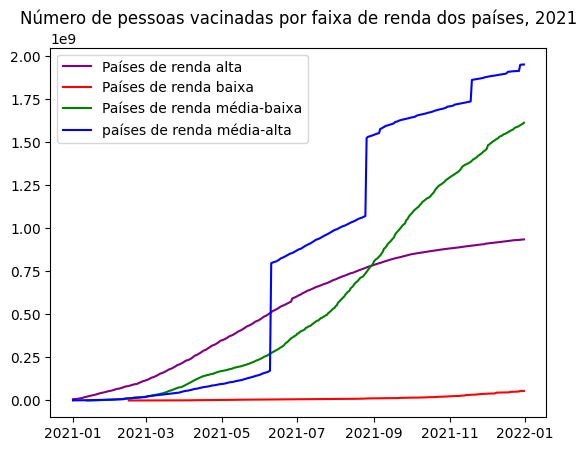

In [31]:
# criando um gráfico de linhas para a vacinação dos países ao longo de 2021
plt.plot(high_income["date"], high_income["people_vaccinated"], color="purple")
plt.plot(low_income["date"], low_income["people_vaccinated"], color="red")
plt.plot(lower_middle_income["date"], lower_middle_income["people_vaccinated"], color="green")
plt.plot(upper_middle_income["date"], upper_middle_income["people_vaccinated"], color="blue")

# organizando a legenda do gráfico
legenda = ["Países de renda alta", "Países de renda baixa", "Países de renda média-baixa", "países de renda média-alta"]
plt.legend(legenda)
plt.title("Número de pessoas vacinadas por faixa de renda dos países, 2021")
# meses = ["Janeiro", "Março", "Maio", "Julho", "Setembro", "Novembro", "Dezembro"]

# mostrando o gráfico
plt.show()

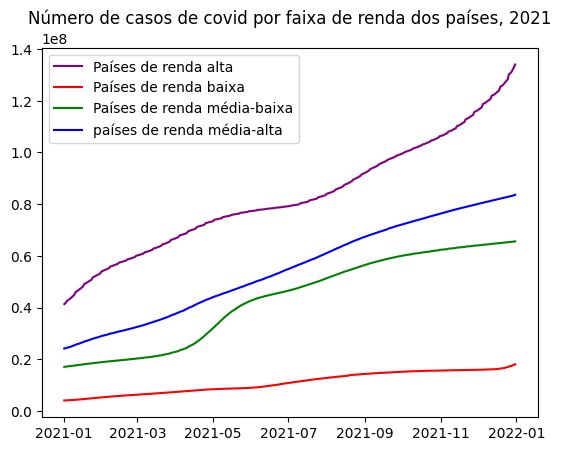

In [32]:
# criando um gráfico de linhas para a vacinação dos países ao longo de 2021
plt.plot(high_income_indicators["date"], high_income_indicators["total_cases"], color="purple")
#multipliquei as mortes de países de baixa renda por 10 para visualizar melhor
plt.plot(low_income_indicators["date"], low_income_indicators["total_cases"]*10, color="red")
plt.plot(lower_middle_income_indicators["date"], lower_middle_income_indicators["total_cases"], color="green")
plt.plot(upper_middle_income_indicators["date"], upper_middle_income_indicators["total_cases"], color="blue")

# organizando a legenda do gráfico
legenda = ["Países de renda alta", "Países de renda baixa", "Países de renda média-baixa", "países de renda média-alta"]
plt.legend(legenda)
plt.title("Número de casos de covid por faixa de renda dos países, 2021")
# meses = ["Janeiro", "Março", "Maio", "Julho", "Setembro", "Novembro", "Dezembro"]

# mostrando o gráfico
plt.show()

In [58]:
df_indicadoresTop = df_filtrado_indicadores.sort_values("total_deaths", ascending=False)
df_indicadoresTop = df_indicadoresTop[(df_indicadoresTop["location"] != "World") & (df_indicadoresTop["location"] != "High income") & (df_indicadoresTop["location"] != "Low income") & (df_indicadoresTop["location"] != "Europe") & (df_indicadoresTop["location"] != "Asia") & (df_indicadoresTop["location"] != "Upper middle income") & (df_indicadoresTop["location"] != "Lower middle income") & (df_indicadoresTop["location"] != "North America") & (df_indicadoresTop["location"] != "European Union") & (df_indicadoresTop["location"] != "South America")  & (df_indicadoresTop["location"] != "Africa")  & (df_indicadoresTop["location"] != "Europe") & (df_indicadoresTop["date"] == "2021-12-31")]

df_indicadoresTop = df_indicadoresTop[0:10]
df_indicadoresTop

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
312035,USA,North America,United States,2021-12-31,53534286.0,474309.0,310812.571,819055.0,1823.0,1573.286,...,24.6,NaN,2.77,78.86,0.926,3.382899e+08,NaN,NaN,NaN,NaN
132775,IND,Asia,India,2021-12-31,34838804.0,16764.0,9454.000,481080.0,220.0,278.143,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
39990,BRA,South America,Brazil,2021-12-31,22263834.0,9128.0,5843.714,618817.0,112.0,103.714,...,17.9,NaN,2.20,75.88,0.765,2.153135e+08,666455.60,24.27,15.83,3109.5383
310727,GBR,Europe,United Kingdom,2021-12-31,13441704.0,272798.0,166404.143,176813.0,132.0,129.429,...,24.7,NaN,2.54,81.32,0.932,6.750894e+07,NaN,NaN,NaN,NaN
242801,RUS,Europe,Russia,2021-12-31,10499982.0,20638.0,22375.571,308860.0,912.0,941.571,...,58.3,NaN,8.05,72.58,0.824,1.447133e+08,1076833.10,30.74,42.09,7421.1763
301571,TUR,Asia,Turkey,2021-12-31,9441764.0,39681.0,27736.857,82104.0,142.0,157.429,...,41.1,NaN,2.81,77.69,0.820,8.534125e+07,181821.39,20.34,32.22,2144.7422
100100,FRA,Europe,France,2021-12-31,8709926.0,0.0,74248.571,124165.0,0.0,165.286,...,35.6,NaN,5.98,82.66,0.901,6.781300e+07,NaN,NaN,NaN,NaN
107948,DEU,Europe,Germany,2021-12-31,7014043.0,0.0,27690.286,117692.0,0.0,183.857,...,33.1,NaN,8.00,81.33,0.947,8.336984e+07,NaN,NaN,NaN,NaN
135396,IRN,Asia,Iran,2021-12-31,6192698.0,1936.0,1840.143,131572.0,45.0,44.286,...,21.1,NaN,1.50,76.68,0.783,8.855057e+07,NaN,NaN,NaN,NaN
279363,ESP,Europe,Spain,2021-12-31,6100138.0,0.0,70149.429,91275.0,0.0,83.429,...,31.4,NaN,2.97,83.56,0.904,4.755863e+07,NaN,NaN,NaN,NaN


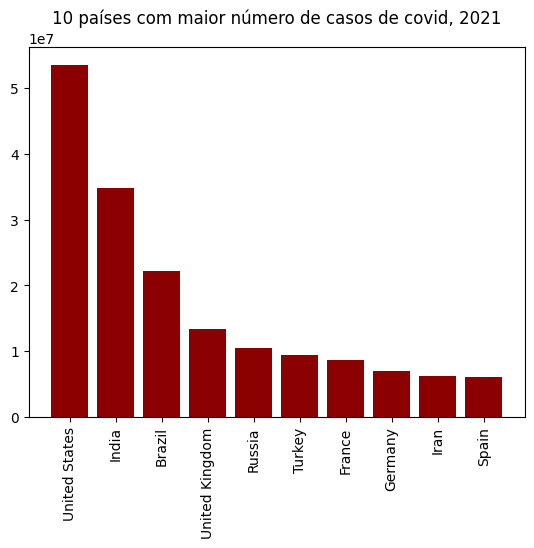

In [71]:
# Gráfico com os 10 países com mais mortes
# labels_bar = ['United States', 'India', 'Brazil', 'United Kingdom', 'Russia', 'Turkey', 'France','Germany','Iran', 'Spain']
plt.bar(df_indicadoresTop["location"], df_indicadoresTop["total_cases"], color="darkred")
plt.xticks(rotation=90)
plt.title("10 países com maior número de casos de covid, 2021")
plt.show()

In [35]:
# Verificando os estilos de gráfico disponíveis
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


C:\Users\ceped\AppData\Local\Temp\ipykernel_24188\2942310170.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels=meses)


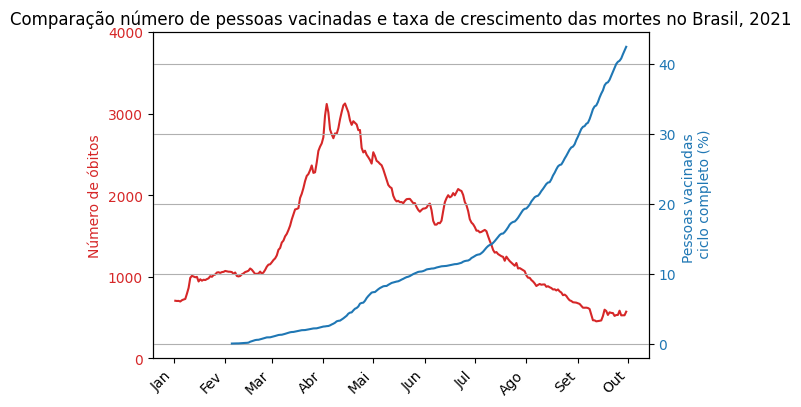

<Figure size 5000x10000 with 0 Axes>

In [36]:
df_brazil = df_vaccination[(df_vaccination["location"] == "Brazil") & (df_vaccination["date"] > "2021-01-01") & (df_vaccination["date"] < "2021-10-01")]
df_brazil_indicadores = df_covidIndicators[(df_covidIndicators["location"] == "Brazil") & (df_covidIndicators["date"] > "2021-01-01") & (df_covidIndicators["date"] < "2021-10-01")]

data1 = df_brazil["people_fully_vaccinated_per_hundred"].to_list()
data2 = df_brazil_indicadores["new_deaths_smoothed"].to_list()
dates1 = df_brazil["date"].to_list()
dates2 = df_brazil_indicadores["date"].to_list()

fig, ax1 = plt.subplots()

color = 'tab:red'
# ax1.set_xlabel('tempo')
ax1.set_ylabel('Número de óbitos', color=color)
ax1.plot(dates2, data2, color=color)
ax1.tick_params(axis='y', labelcolor=color)
meses = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out"]
ax1.set_xticklabels(labels=meses)
ax1.set_yticks(range(0,4001,1000))
fig.autofmt_xdate(rotation= 45)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Pessoas vacinadas \n ciclo completo (%)', color=color) 
ax2.plot(dates1, data1, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Comparação número de pessoas vacinadas e taxa de crescimento das mortes no Brasil, 2021")
plt.grid(None) # tirar a grade duplicada
plt.figure(figsize = (50,100))
plt.style.use("seaborn-v0_8-bright")